# Hubbard parameter calculations for figure6

In [2]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import sys
import os

module_path = os.path.abspath(os.path.join("../src"))
if module_path not in sys.path:
    sys.path.append(module_path)

output_path = os.path.abspath("../../../OneDrive - Rice University/Documents/Research/Hubbard Tweezer Parameters/output/Hubbard/")

The below plots are equalzations from fixing ratio $V_0/52.26\text{kHz}$ to be $0.94,0.95,...,0.99,1$ and the original ratio in the manuscript  $V_0/52.26\text{kHz}=0.96463$.

Equalize: Lieb lattice ghost sites.
Set shape to square for total system.
Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Illegal x0 provided. Use no initial guess.
Equalize: initial guess:  [ 1.    1.    1.    1.    1.    1.    1.    1.   -3.1  -3.2  -3.1  -1.6
 -3.1  -1.55 -3.2  -1.55 -1.6  -1.55 -3.2  -1.6 ]
t max_err =  1.0981638525475574e-12
V max_err =  1.5878647226462738e-07
U max_err =  2.6967360384256882e-08
t max_err =  6.800686460936003e-13
V max_err =  5.352259191371834e-09
U max_err =  6.59722539207579e-10
t max_err =  3.1894478814289063e-13
V max_err =  3.797771178541892e-07
U max_err =  8.667492139779618e-08
t max_err =  4.874069169646065e-14
V max_err =  4.5998073299253614e-07
U max_err =  8.440460659859786e-08
t max_err =  2.580991420618777e-13
V max_err =  1.0958698992716519e-07
U max_err =  1.187138761847337e-08


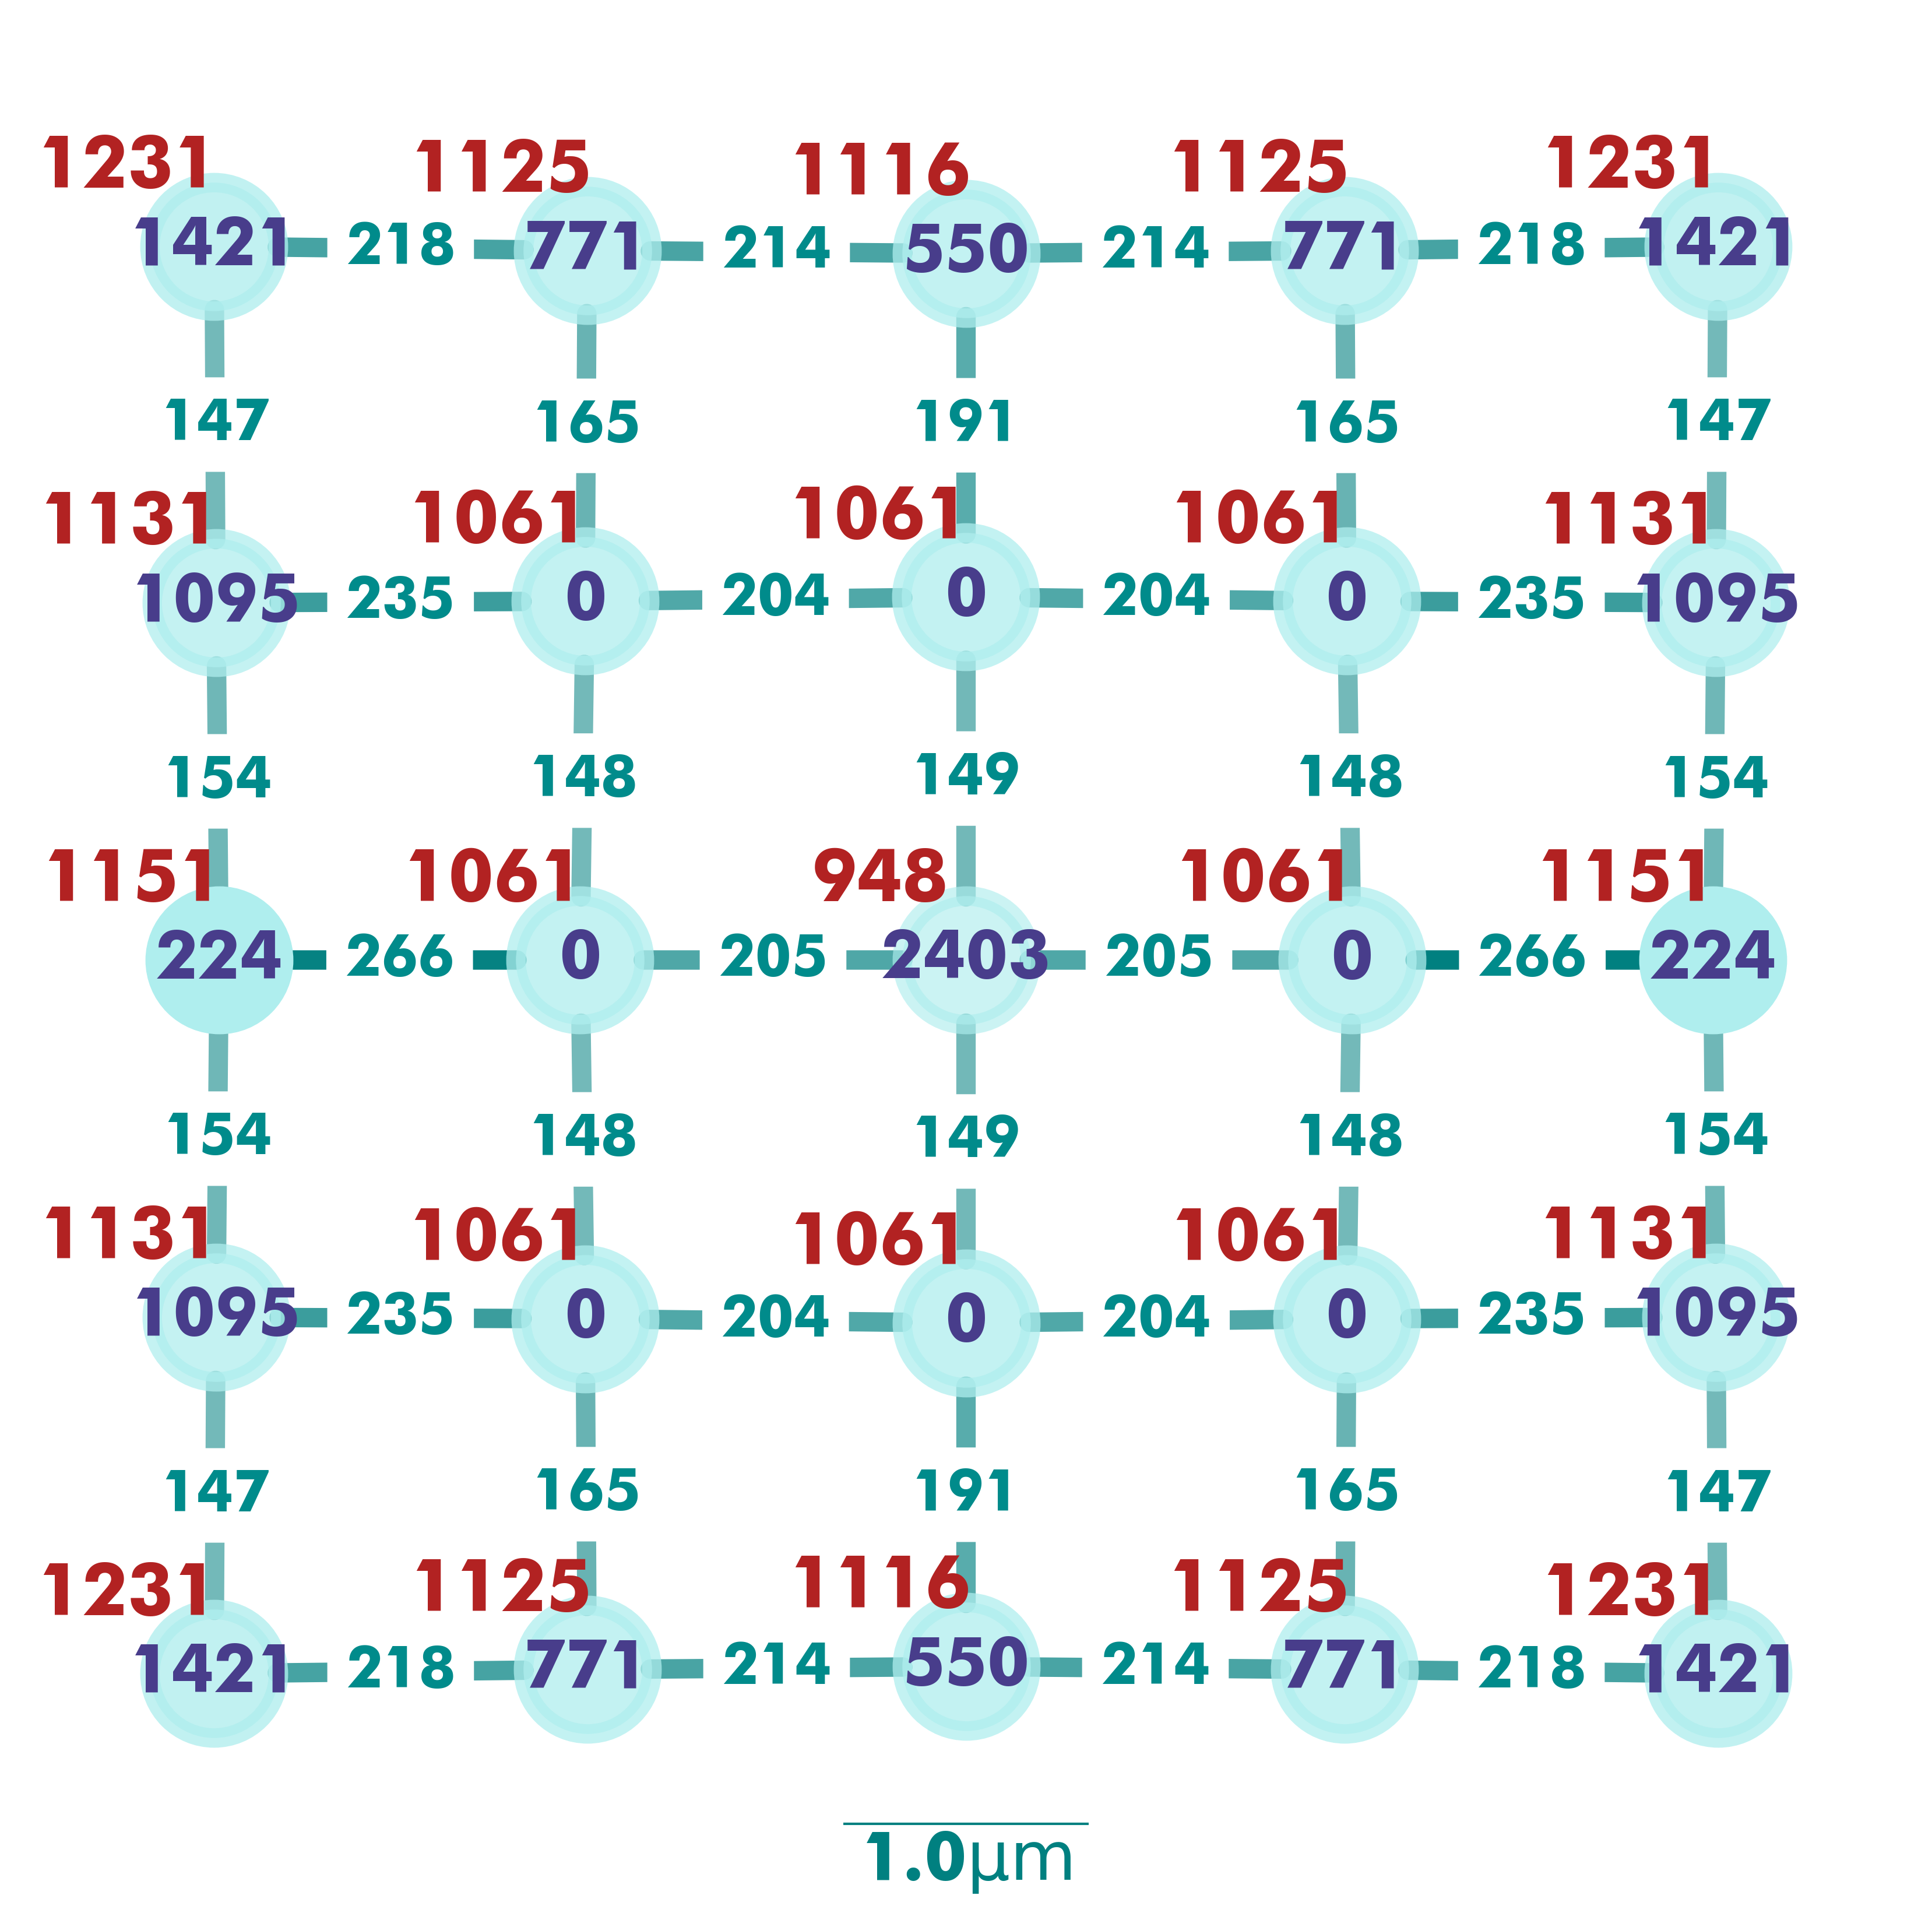

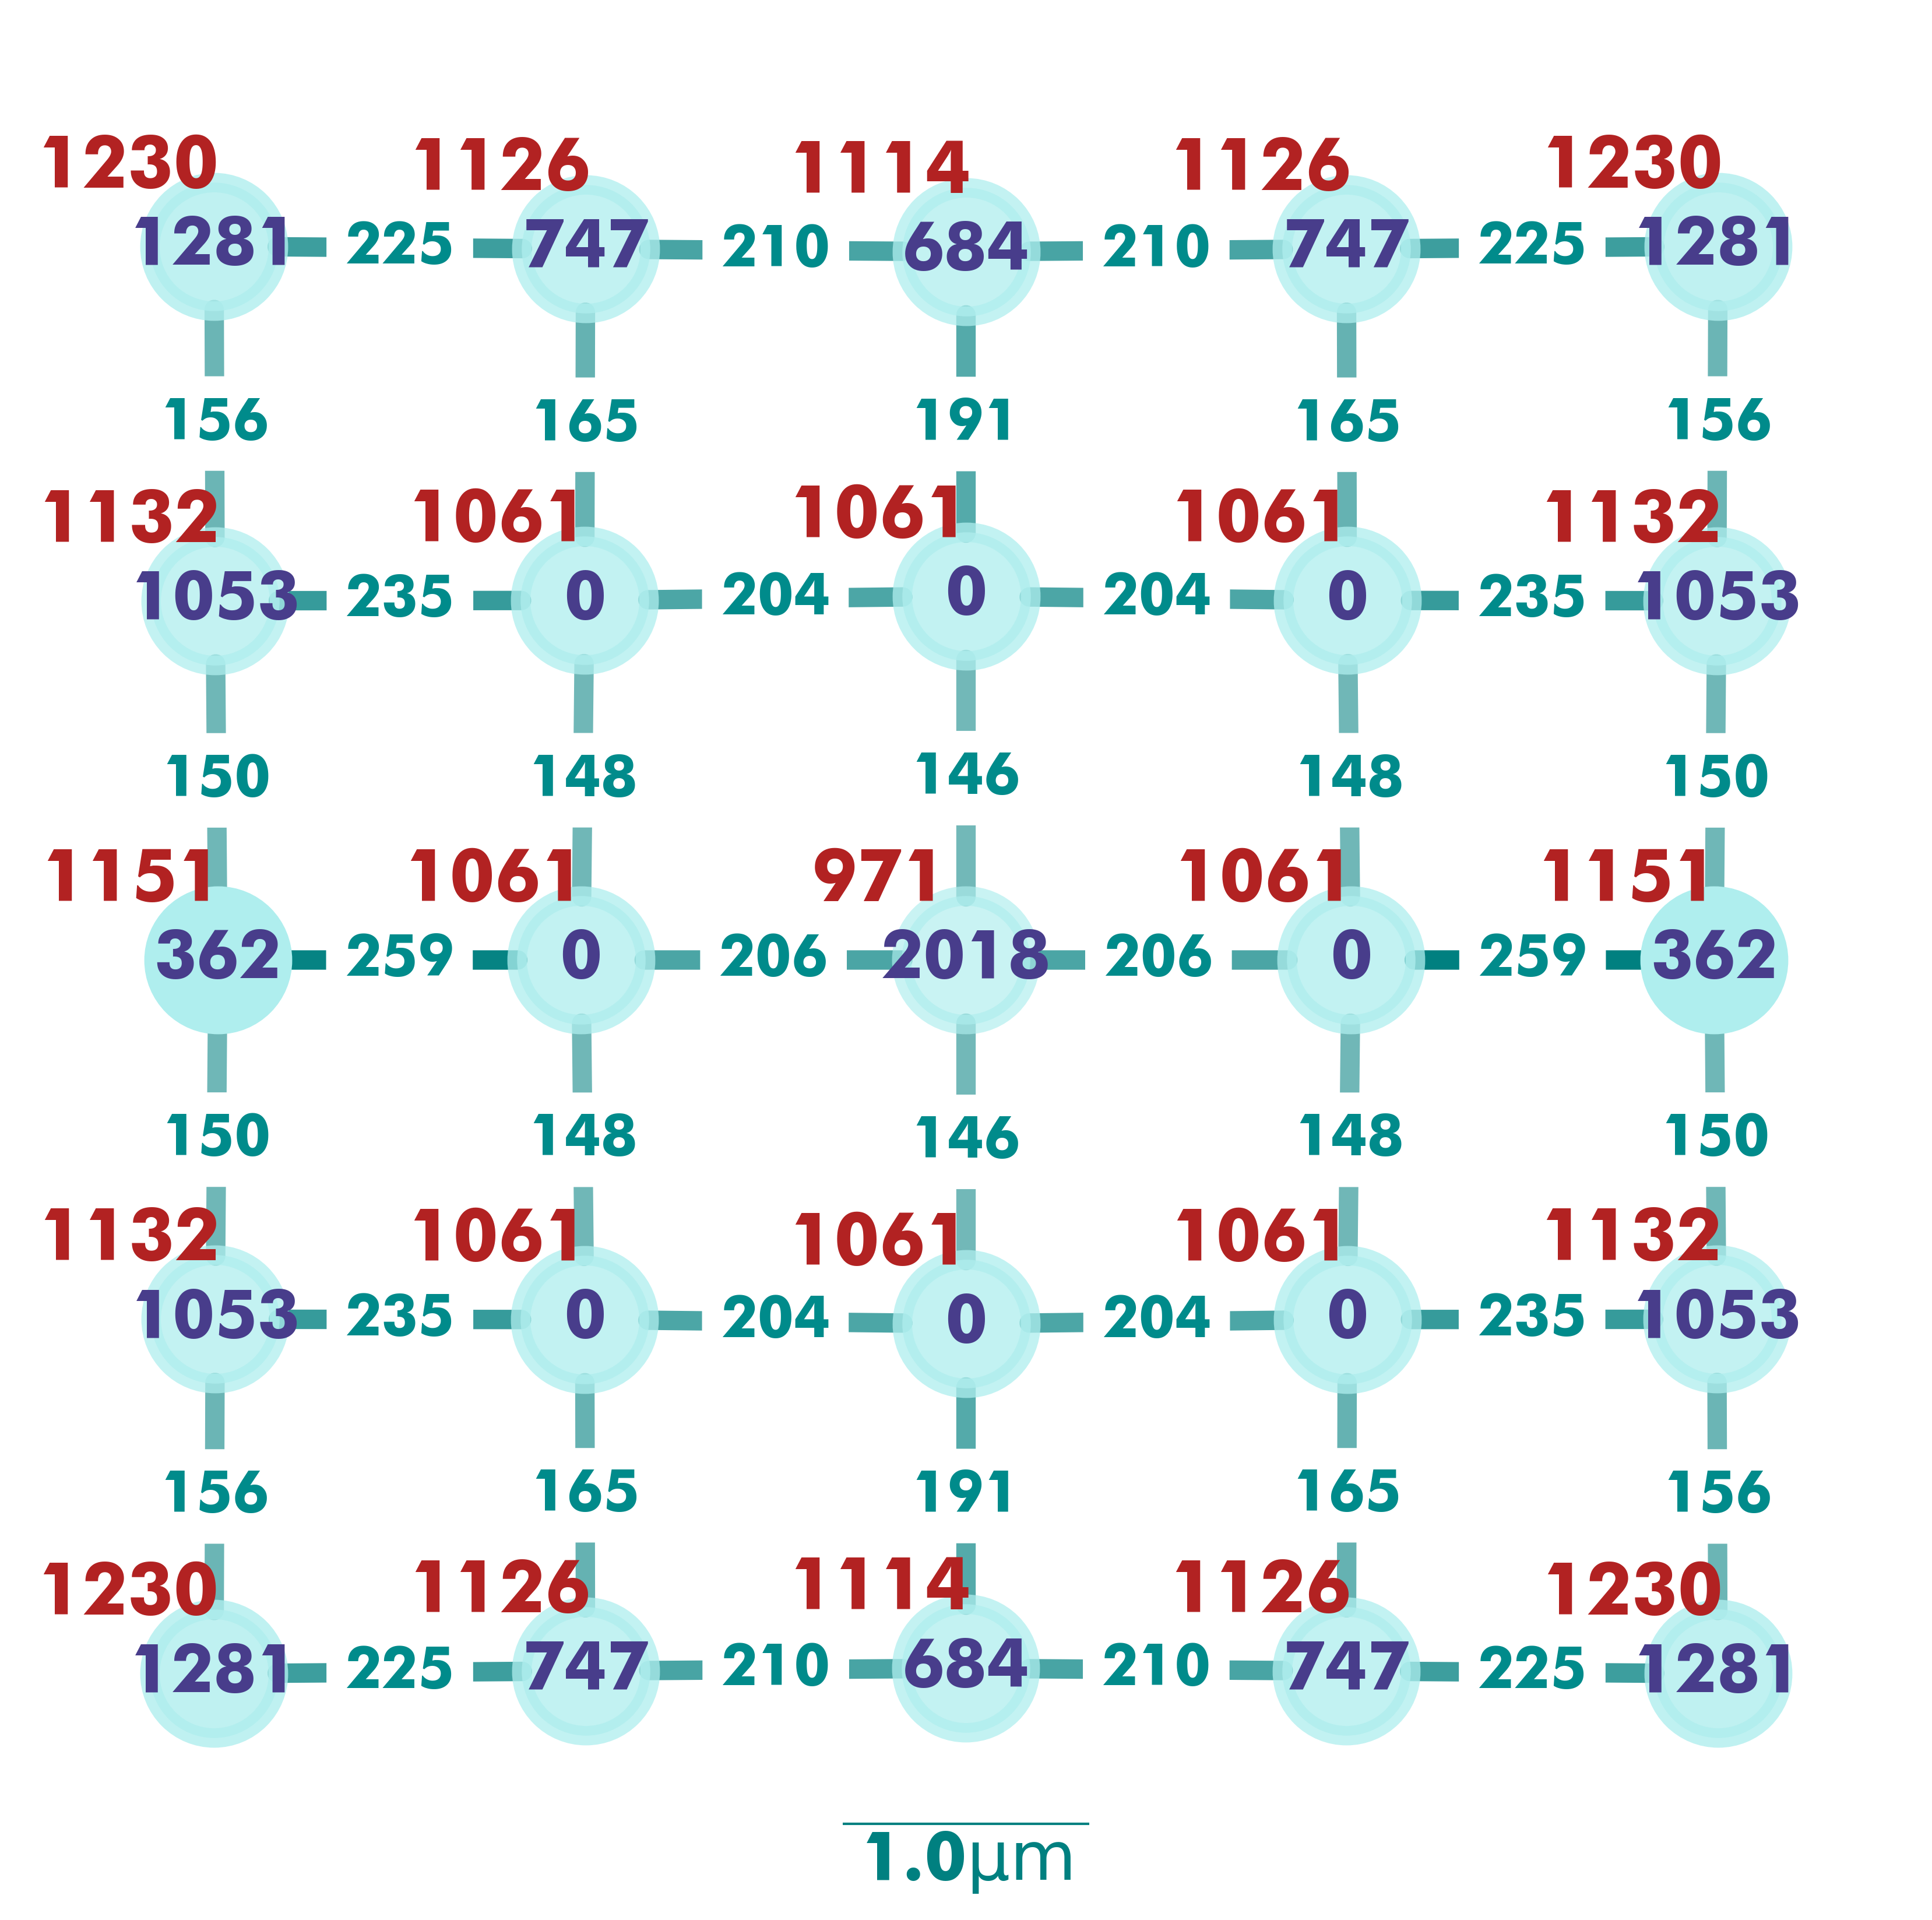

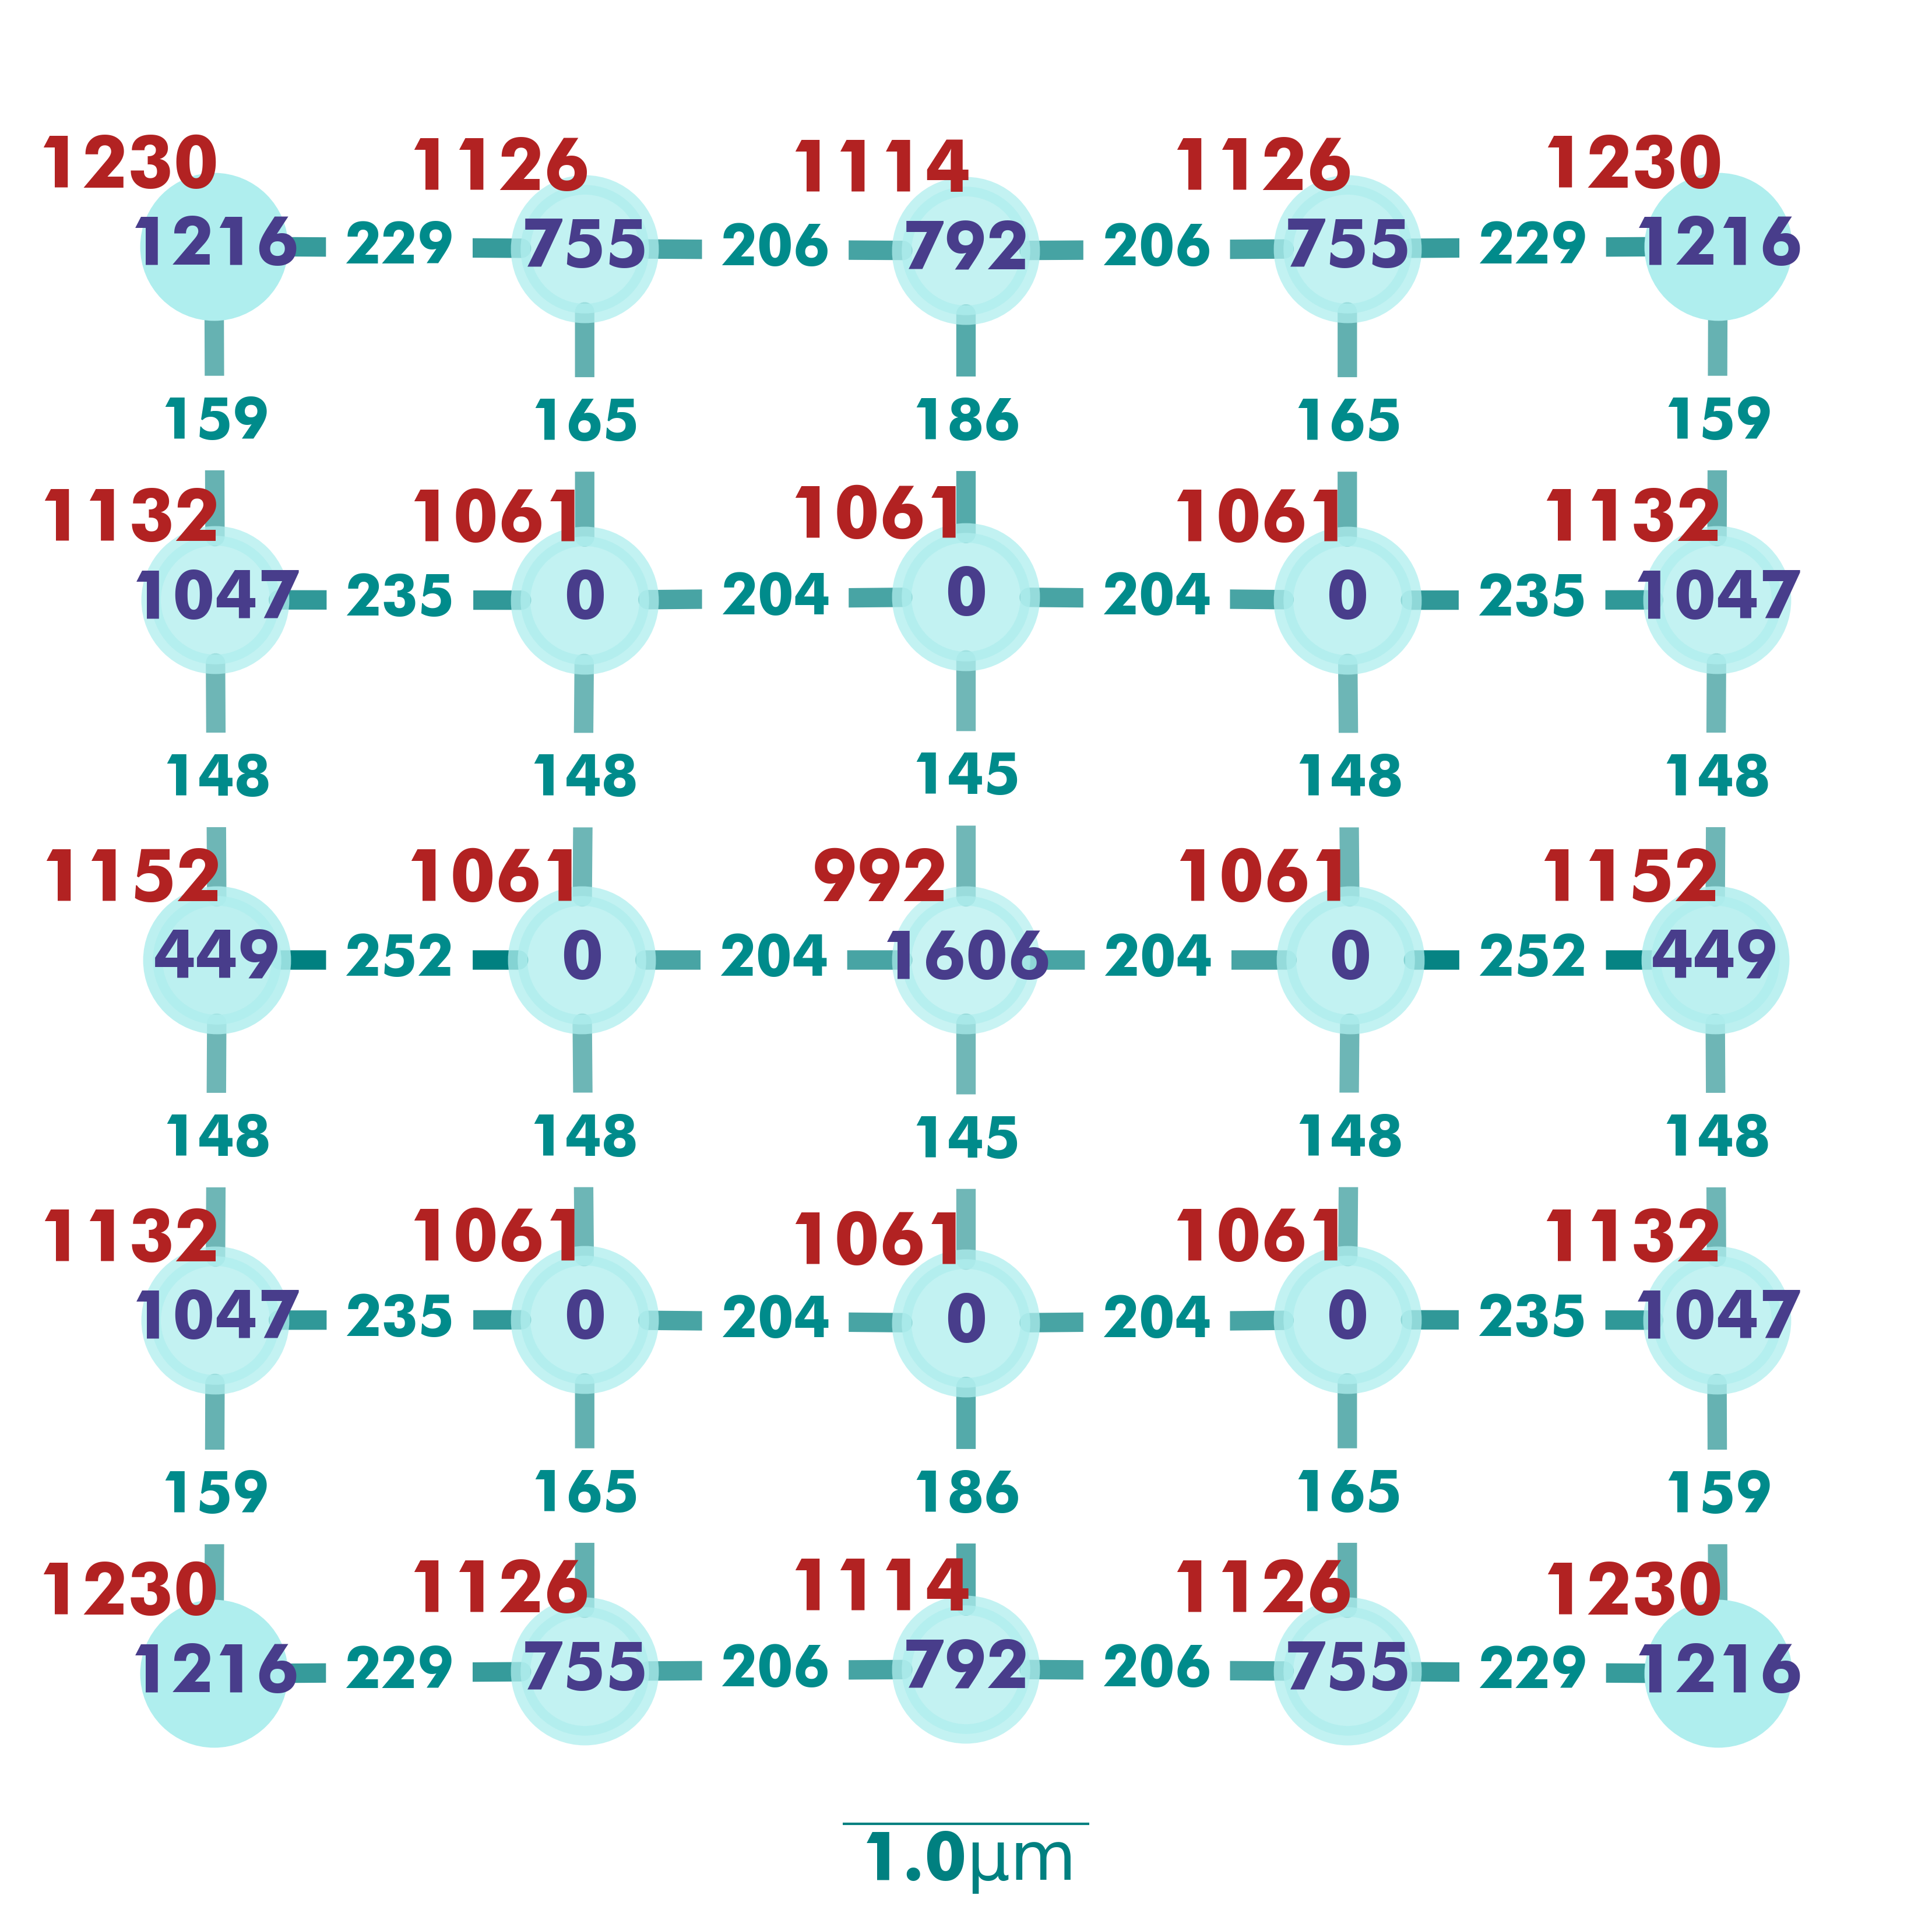

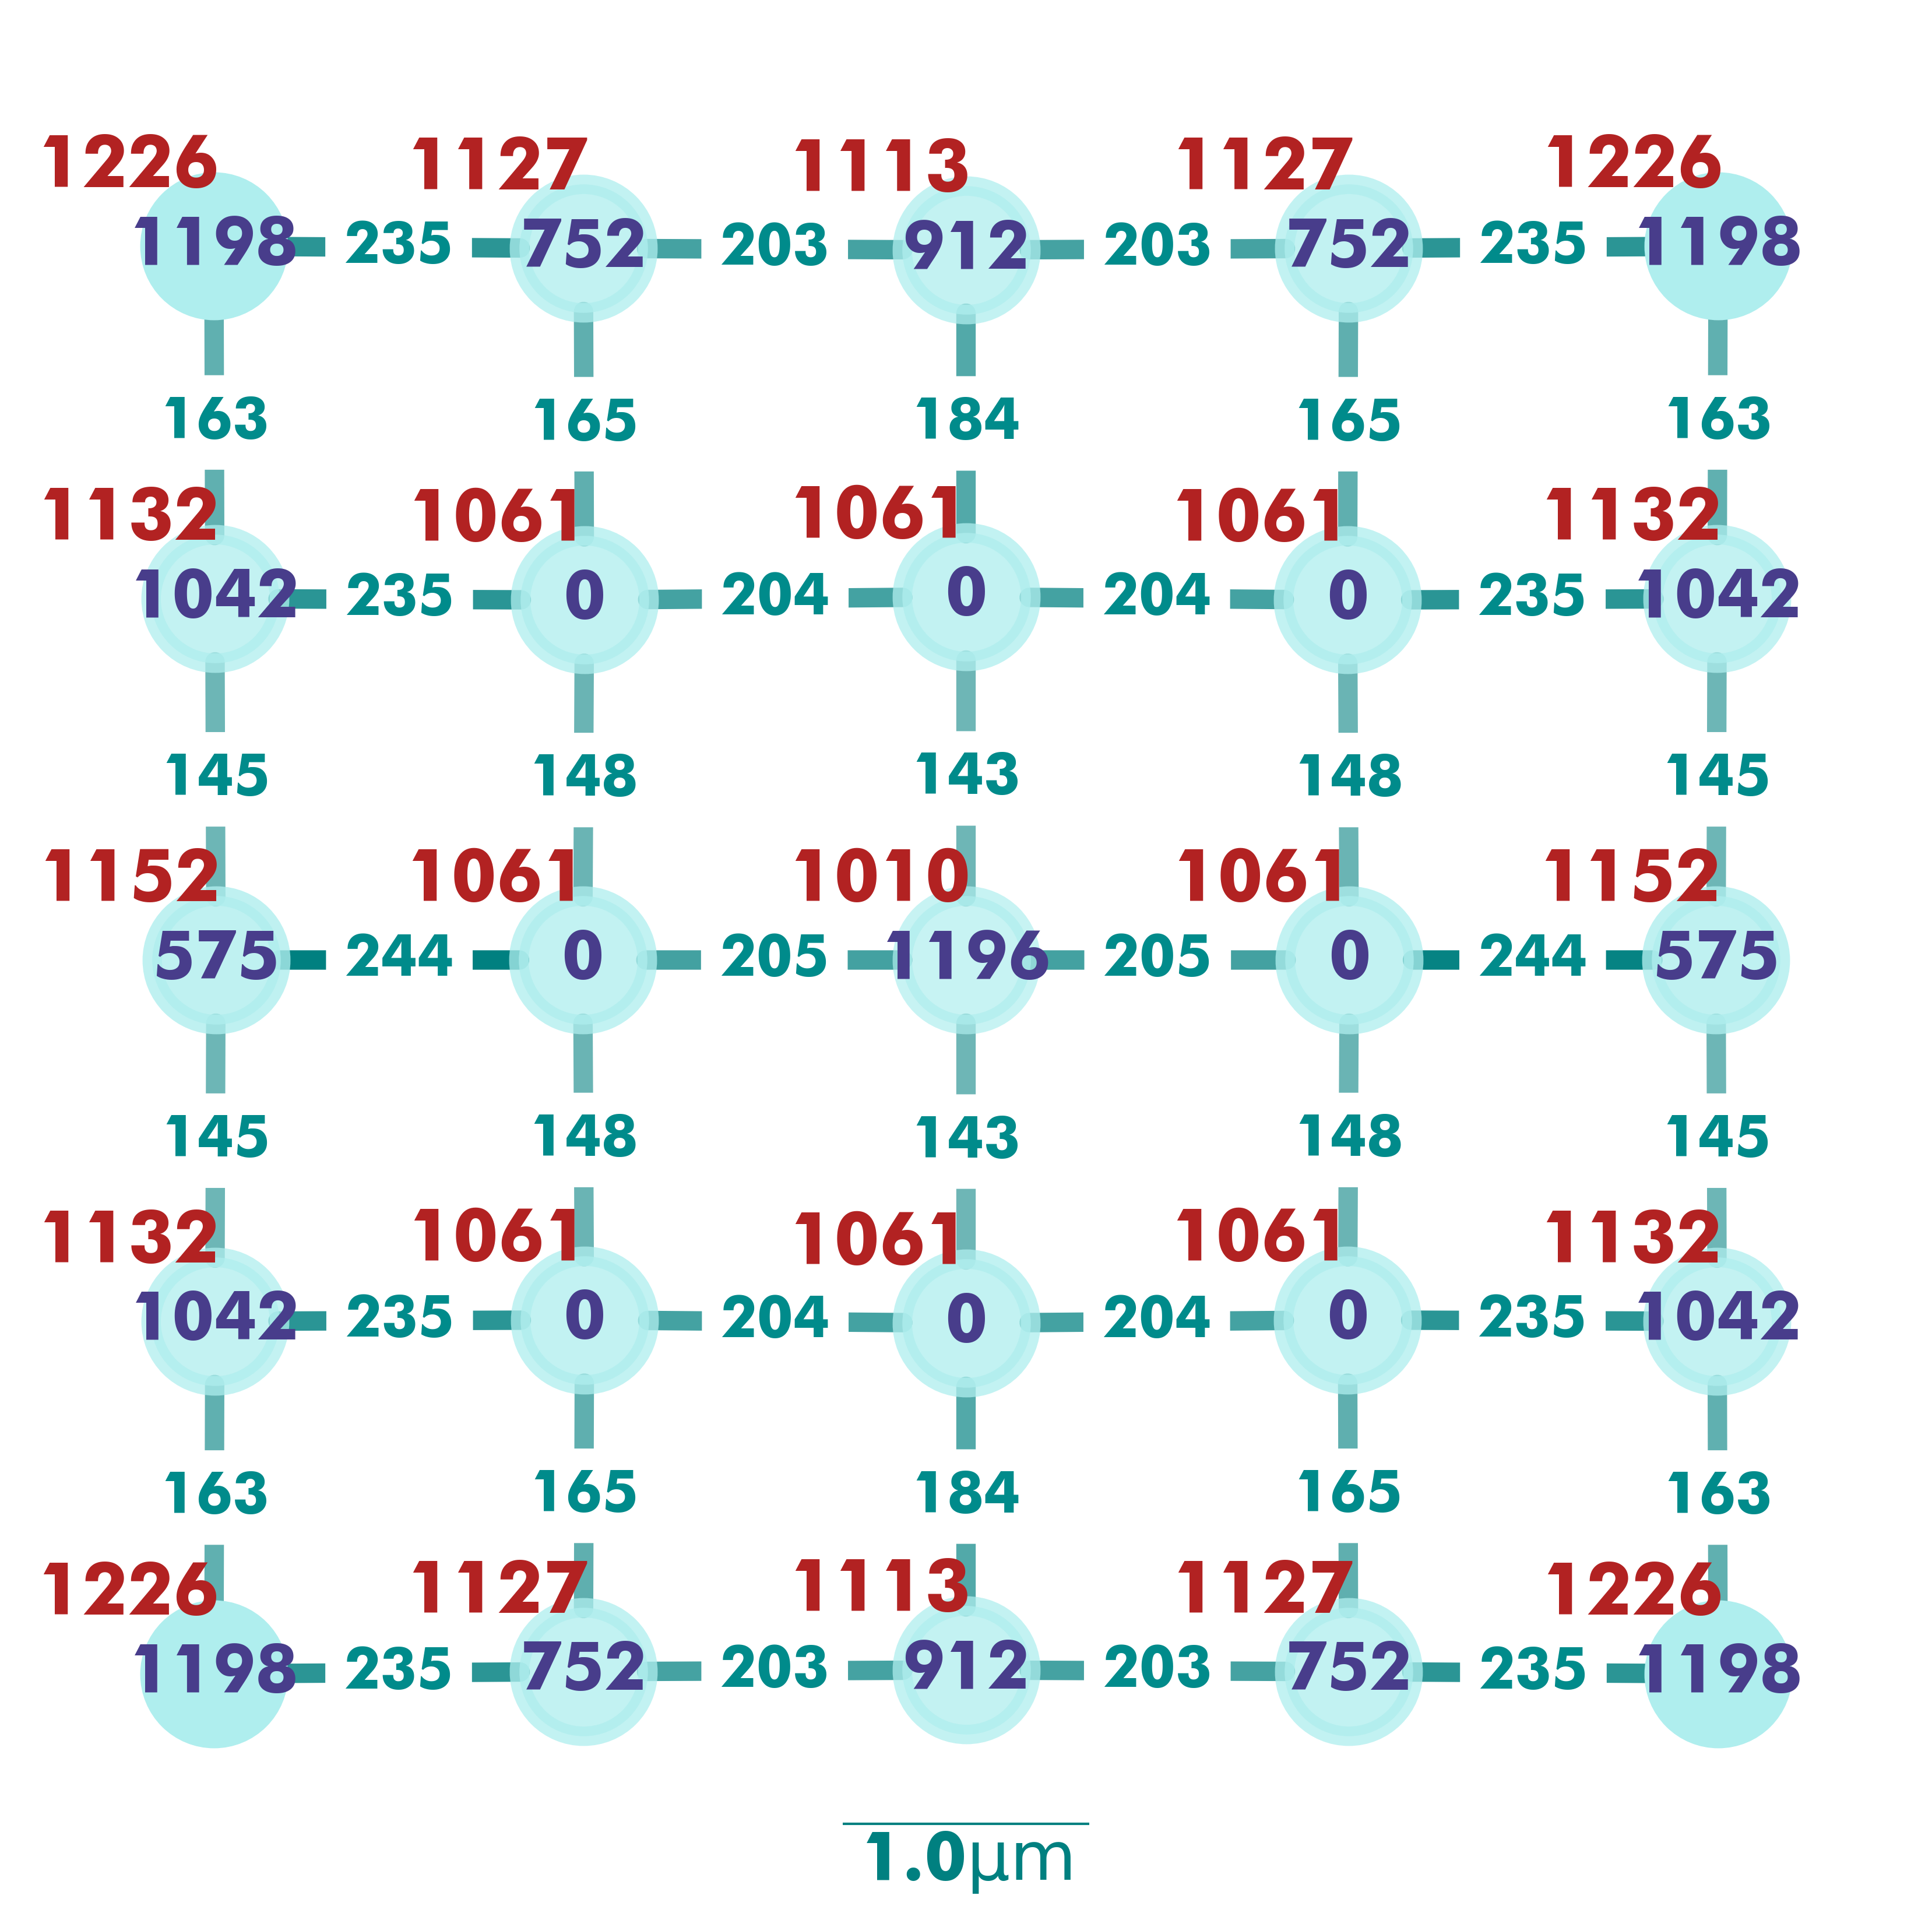

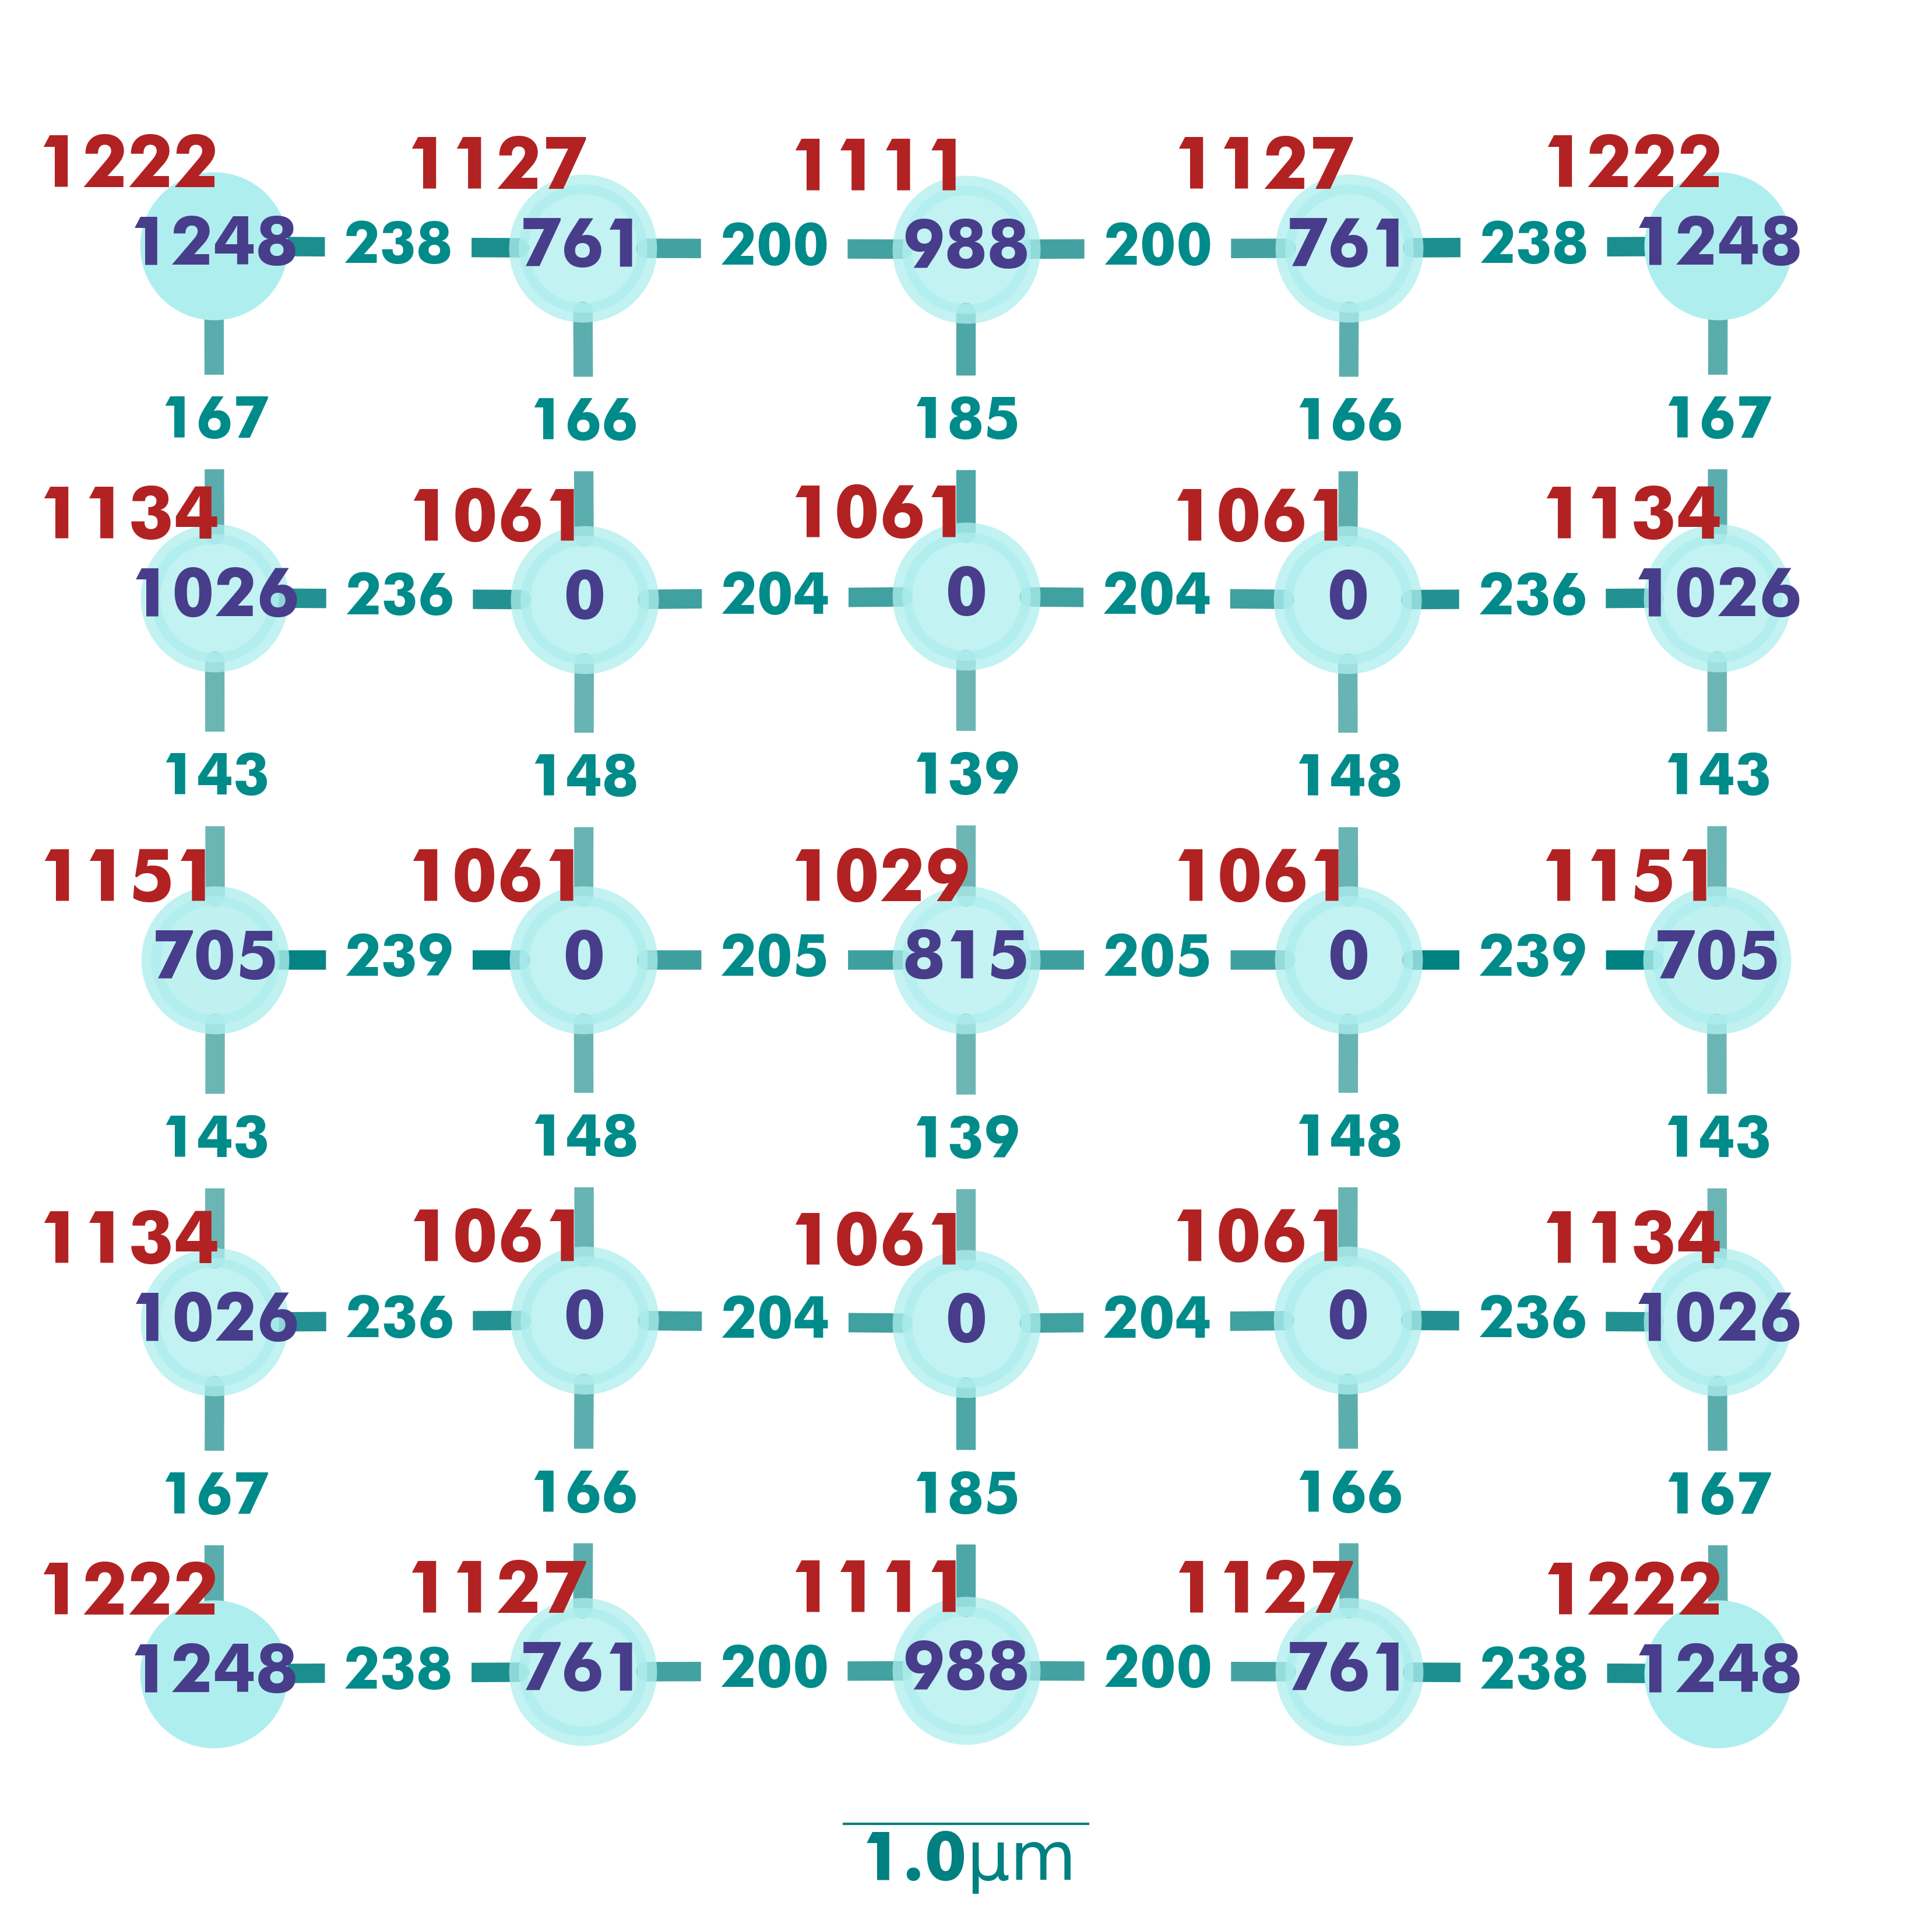

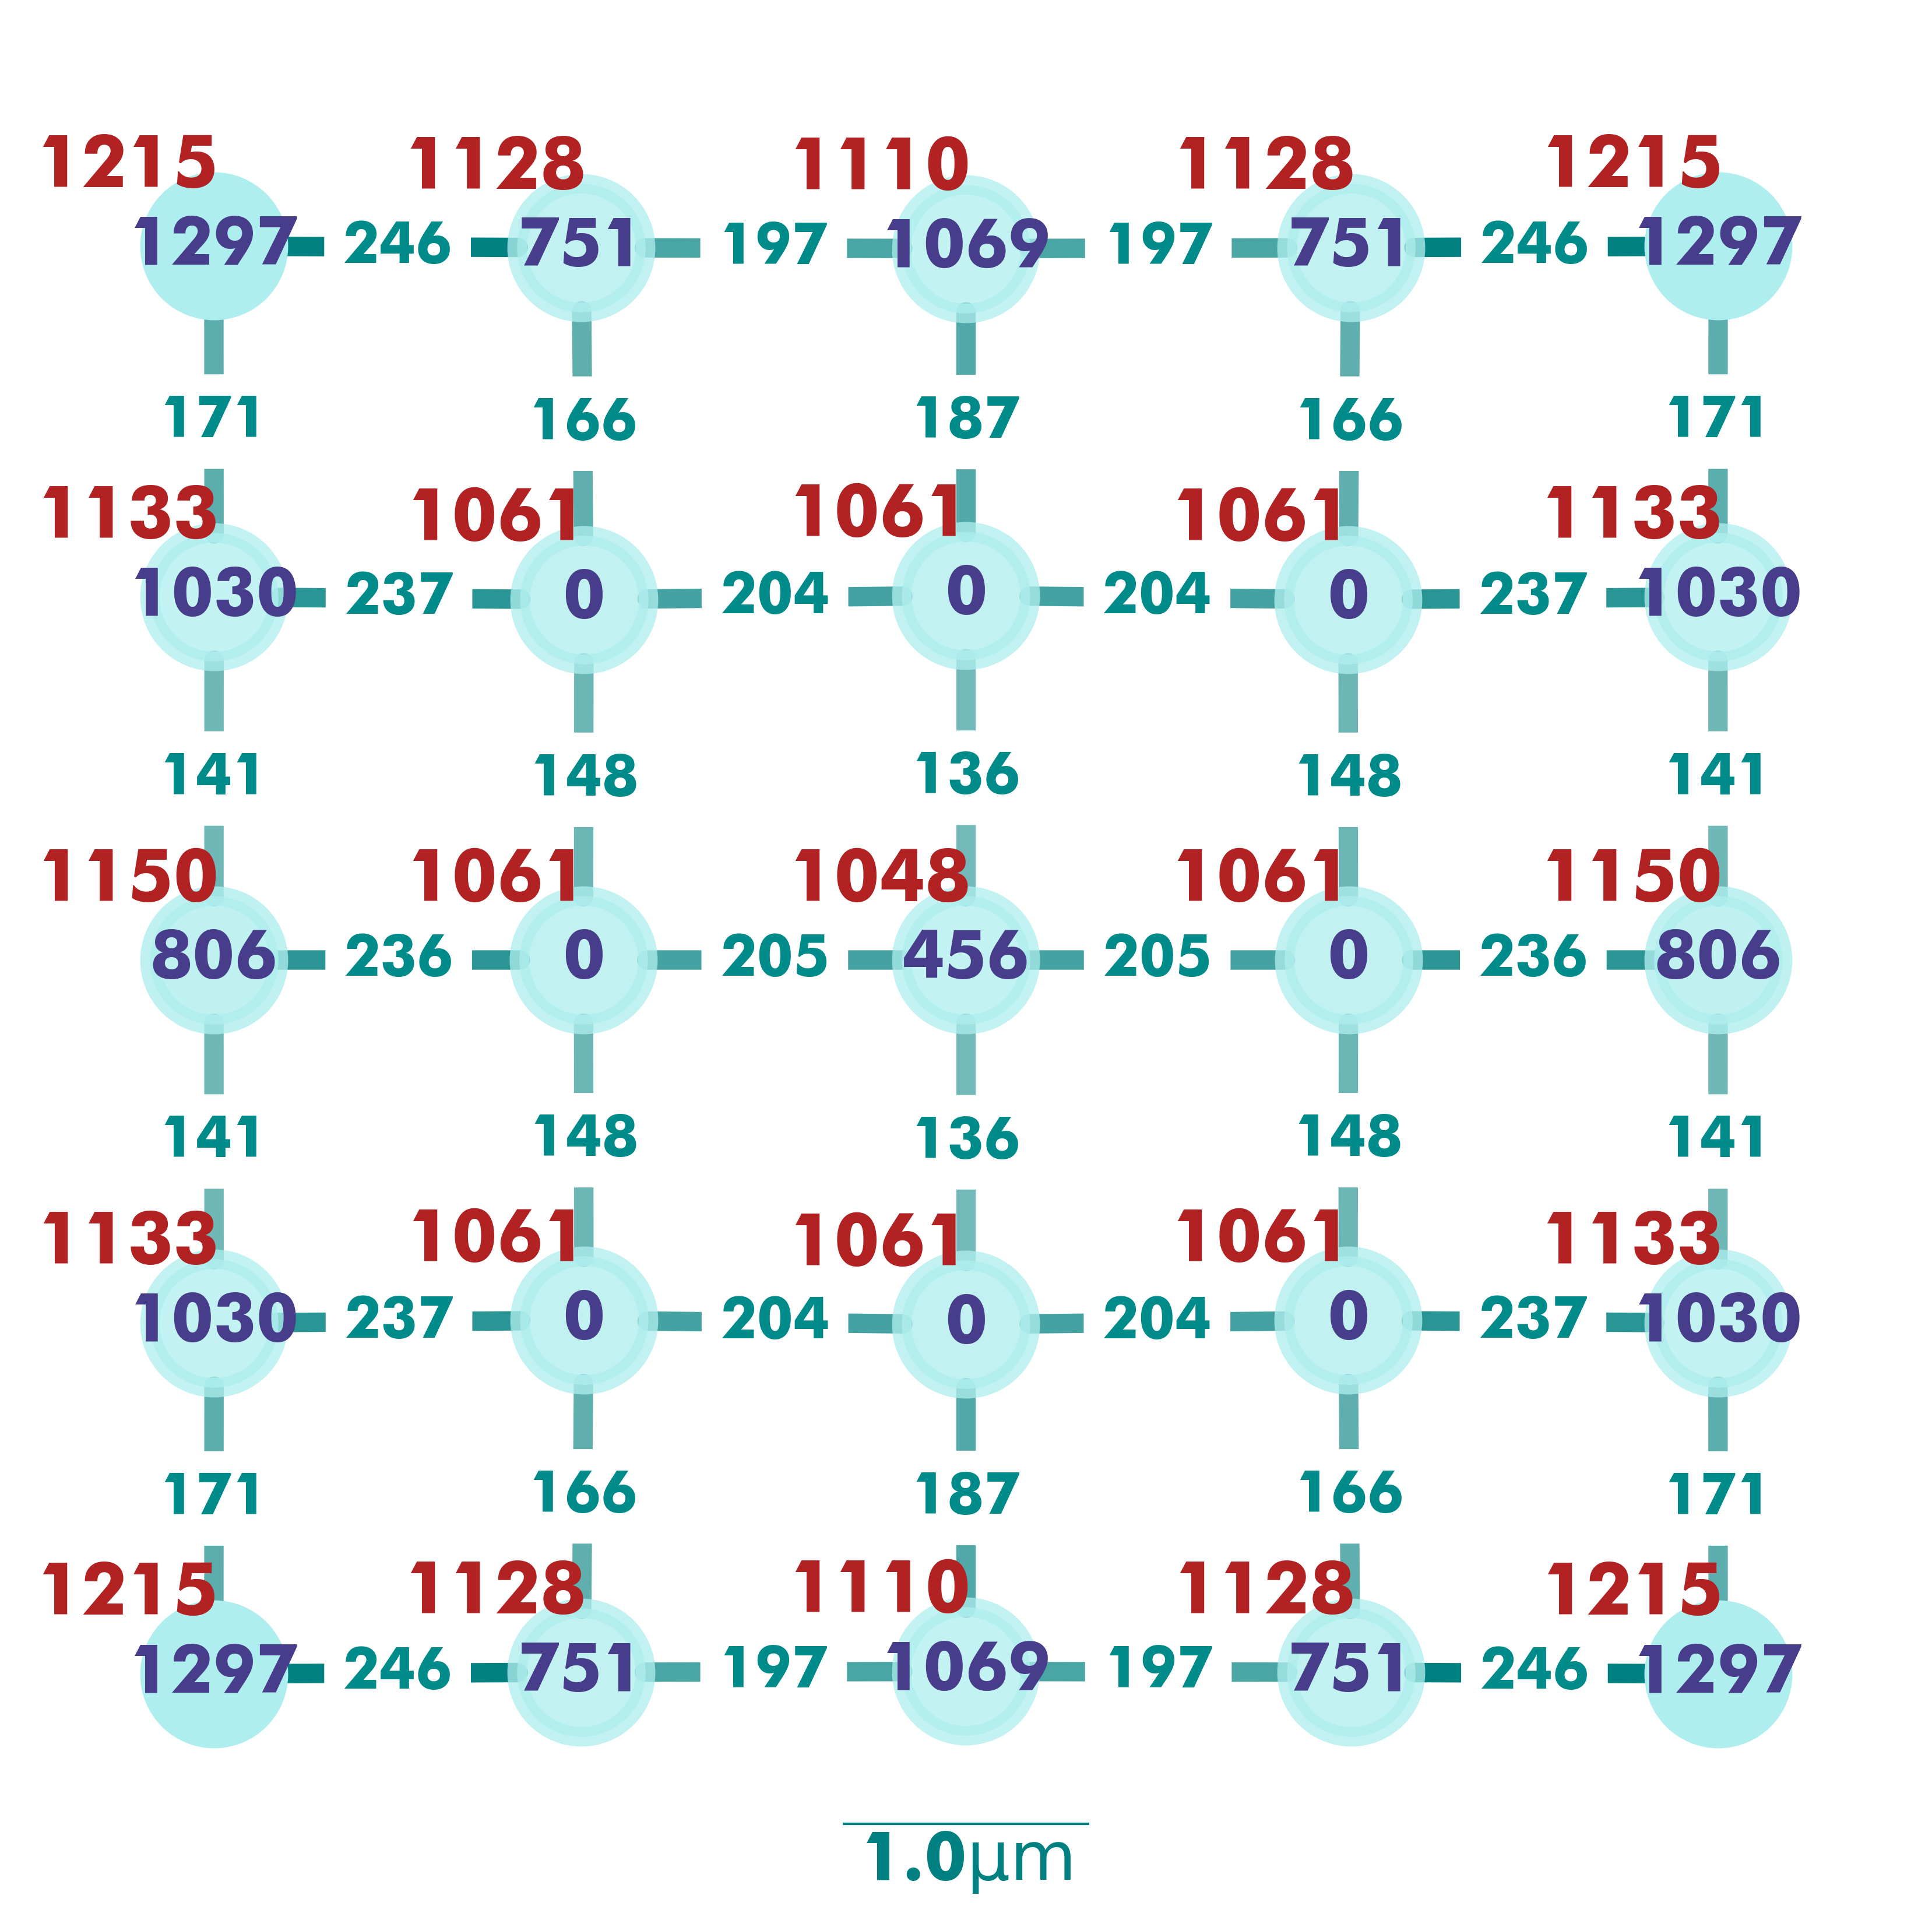

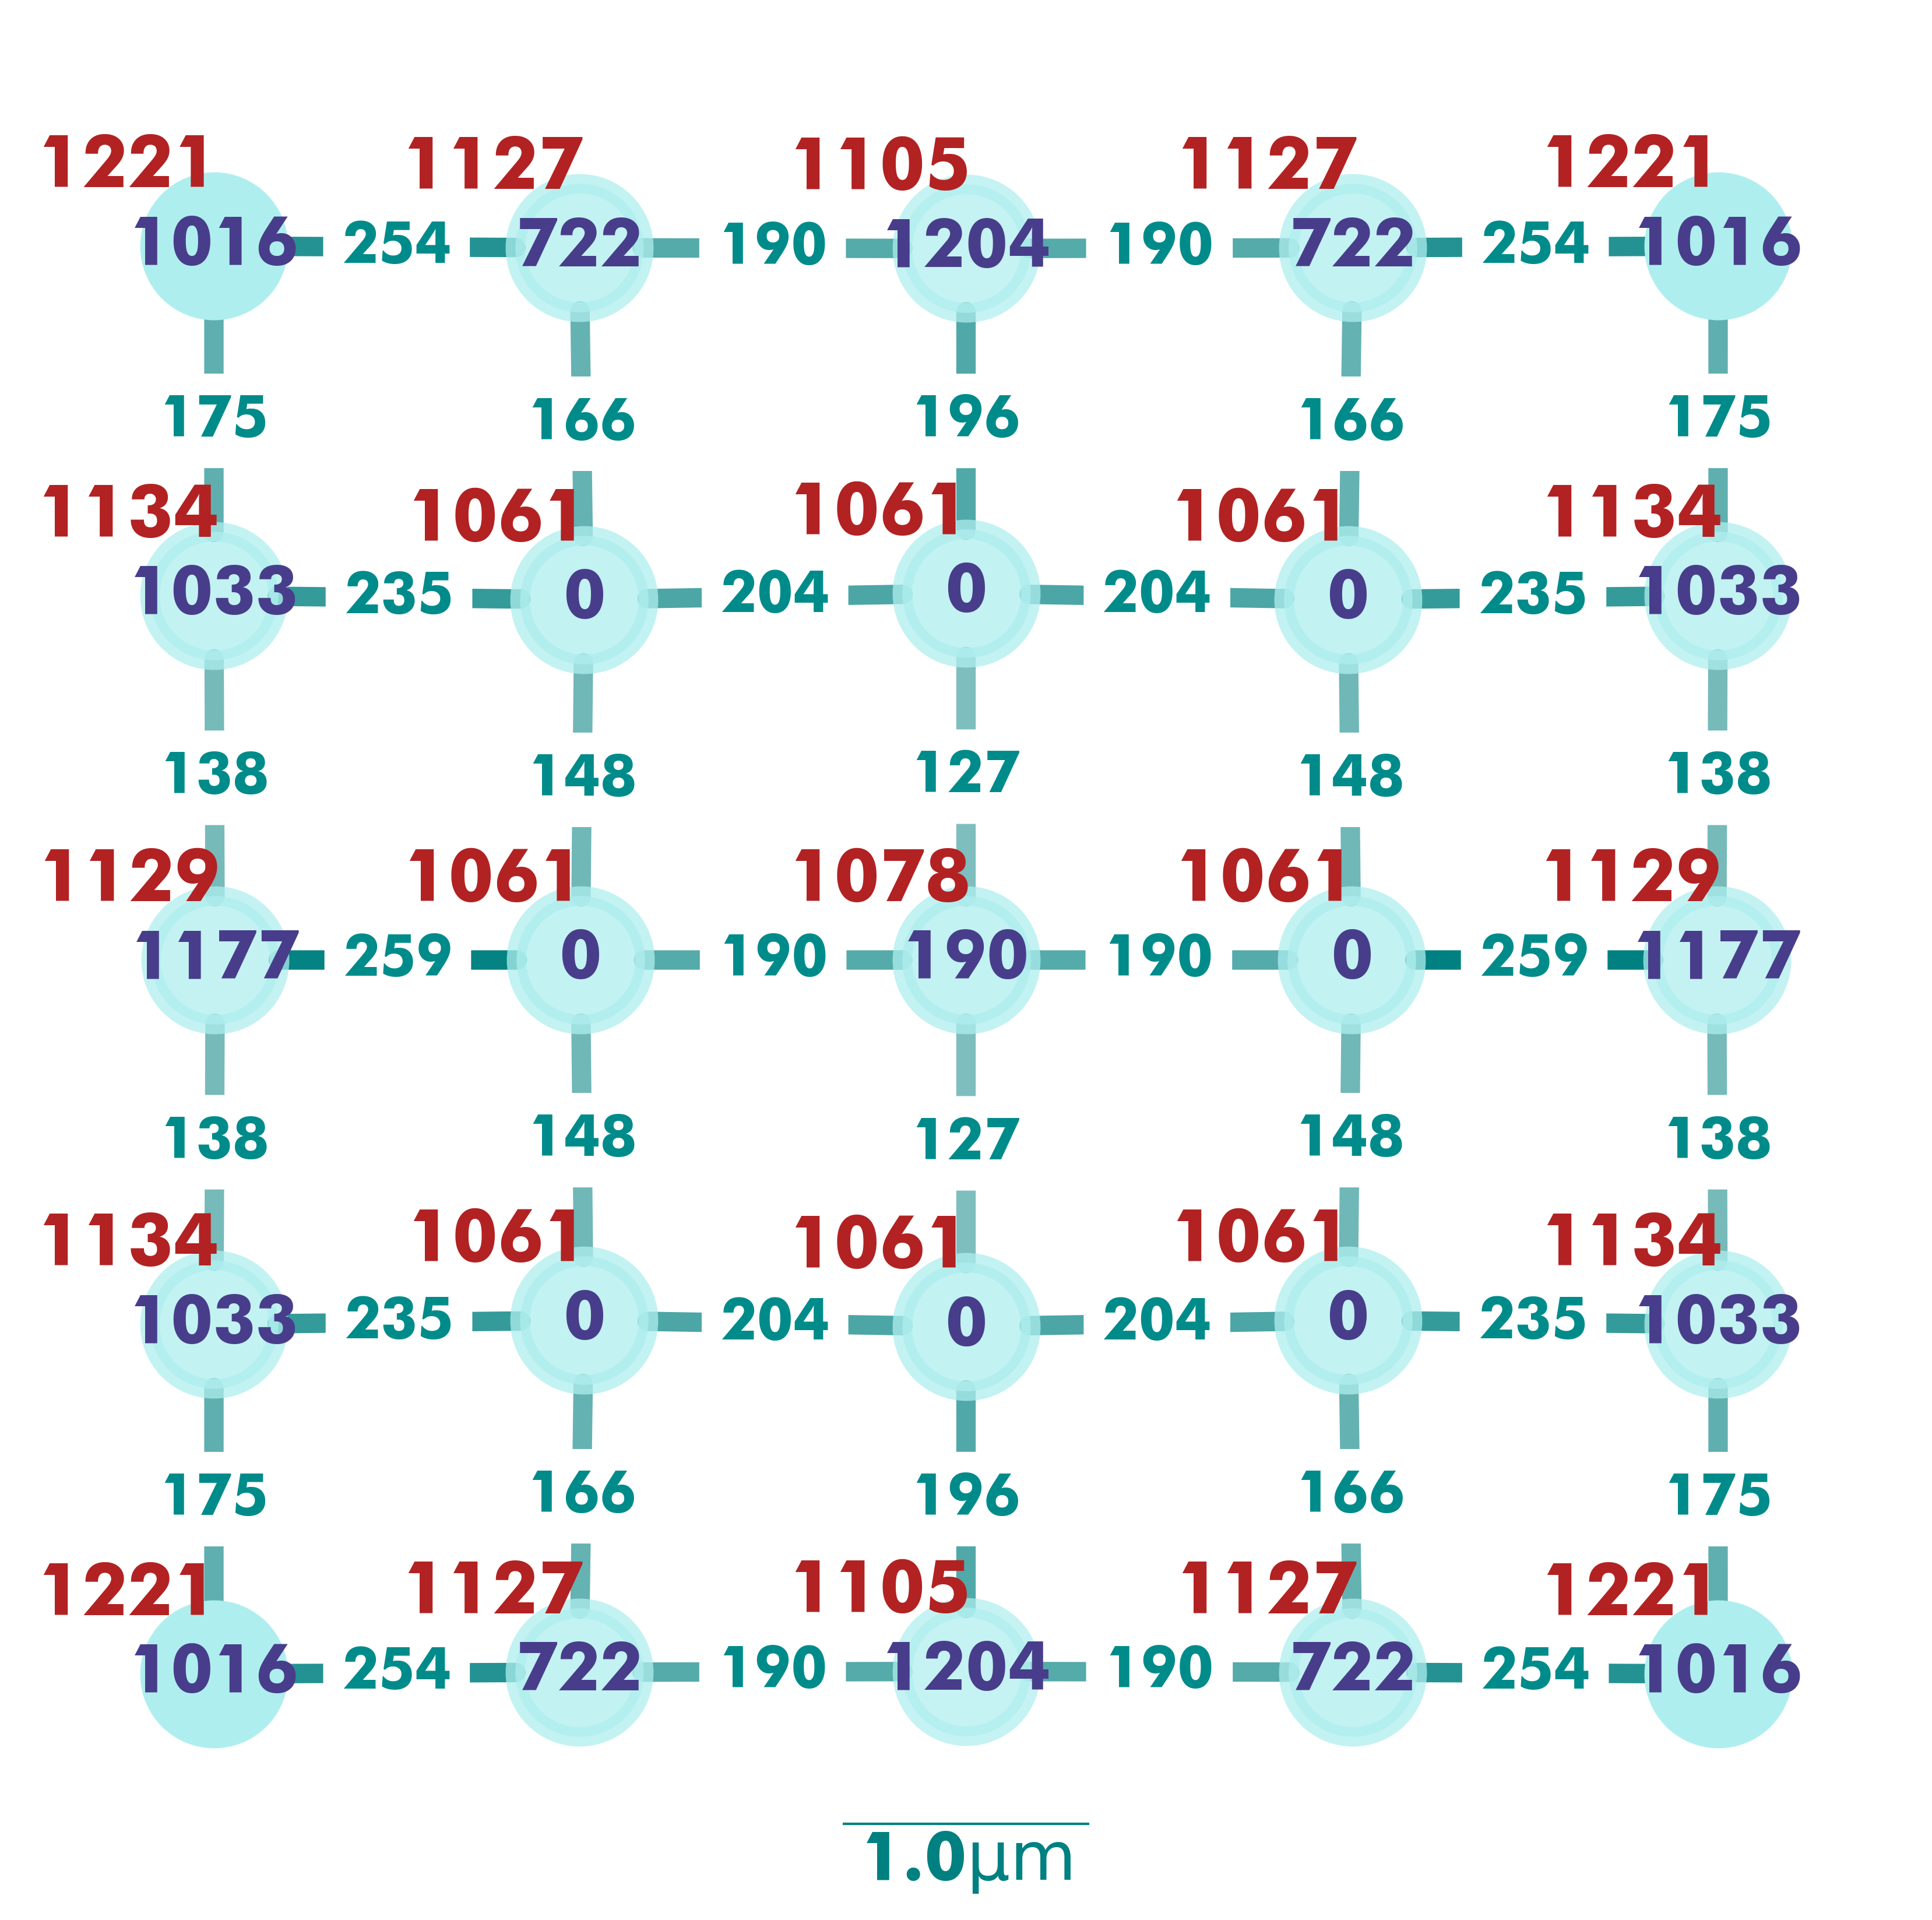

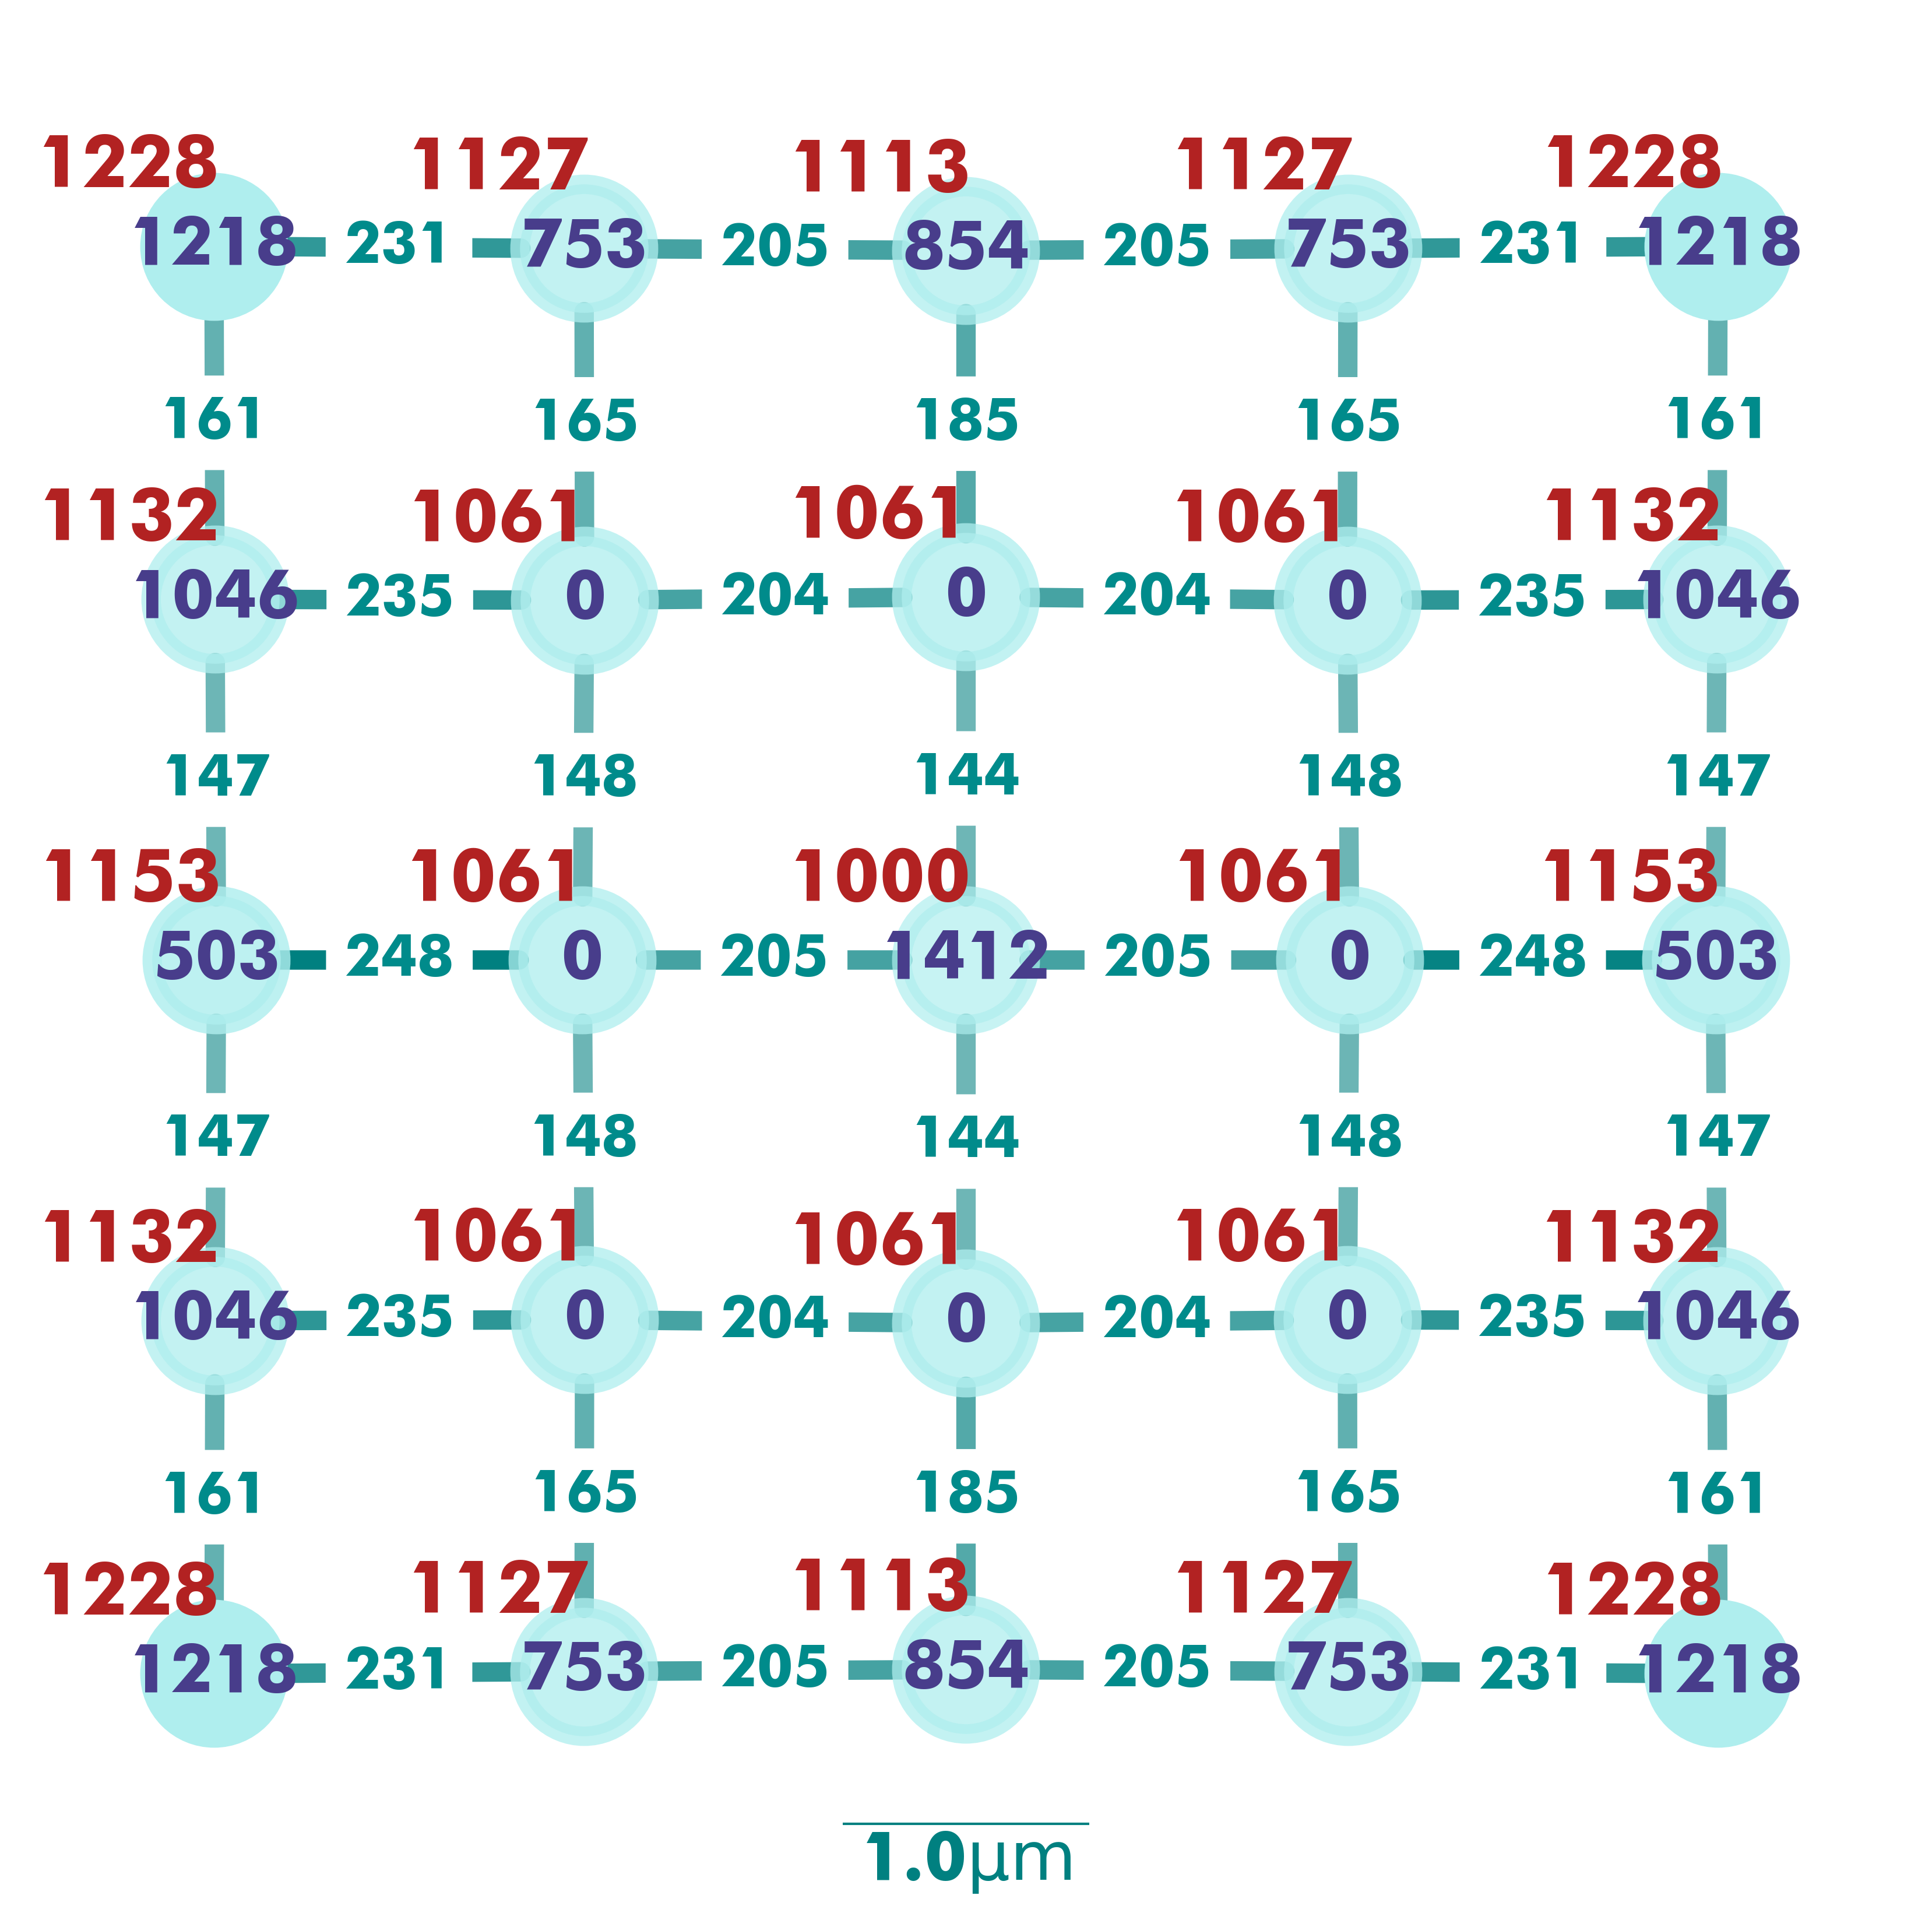

In [5]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 5
Ly = 5
d = 3
shape = "Lieb"
w = None
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape="Lieb",
    waist=w,
    equalize=False,
    equalize_V0=False,
    eqtarget=eqt,
    eqmethod=meth,
    ghost=True,
    symmetry=True,
    verbosity=0,
)

v0list = [0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1, "original"]
err_list = np.zeros(len(v0list))
Vlist = np.zeros(len(v0list))

for i in range(len(v0list)):
    v = v0list[i]
    fn = os.path.join(output_path, f"scan over v/{v}.ini")
    # update_tc(fn, G)
    # update_saved_data(fn, G)
    G = read_file(fn, G)
    G.draw_graph(nnn=False, A=G.A, U=G.U)
    maskedA = G.ghost.mask_quantity(G.A)
    maskedU = G.ghost.mask_quantity(G.U)
    nnt = G.nn_tunneling(maskedA)
    links = G.xy_links(G.ghost.links)
    func = lambda x: np.max(x) - np.min(x)
    tx, ty = G.txy_target(nnt, links, func)
    V = np.diag(maskedA)
    ct = max(tx, ty) * 1e-3 / G.sf
    cv = (np.max(V) - np.min(V)) / G.sf
    cu = (np.max(maskedU) - np.min(maskedU)) / G.sf
    print("t max_err = ", ct)
    print("V max_err = ", cv)
    print("U max_err = ", cu)
    err_list[i] = ct + cv + cu
    Vlist[i] = G.A[12, 12] * 1000

v0list[-1] = 0.9646299086821818
varr = np.array(v0list)
varr = (1 - varr) * 52260
idx = np.argsort(varr)
varr = varr[idx]
err_list = err_list[idx]
Vlist = Vlist[idx]

Center trap potential vs fixed $\Delta V_0 = |V_0 -52.26\text{kHz}|$:

Text(0, 0.5, '$V_\\mathrm{center}$ (Hz)')

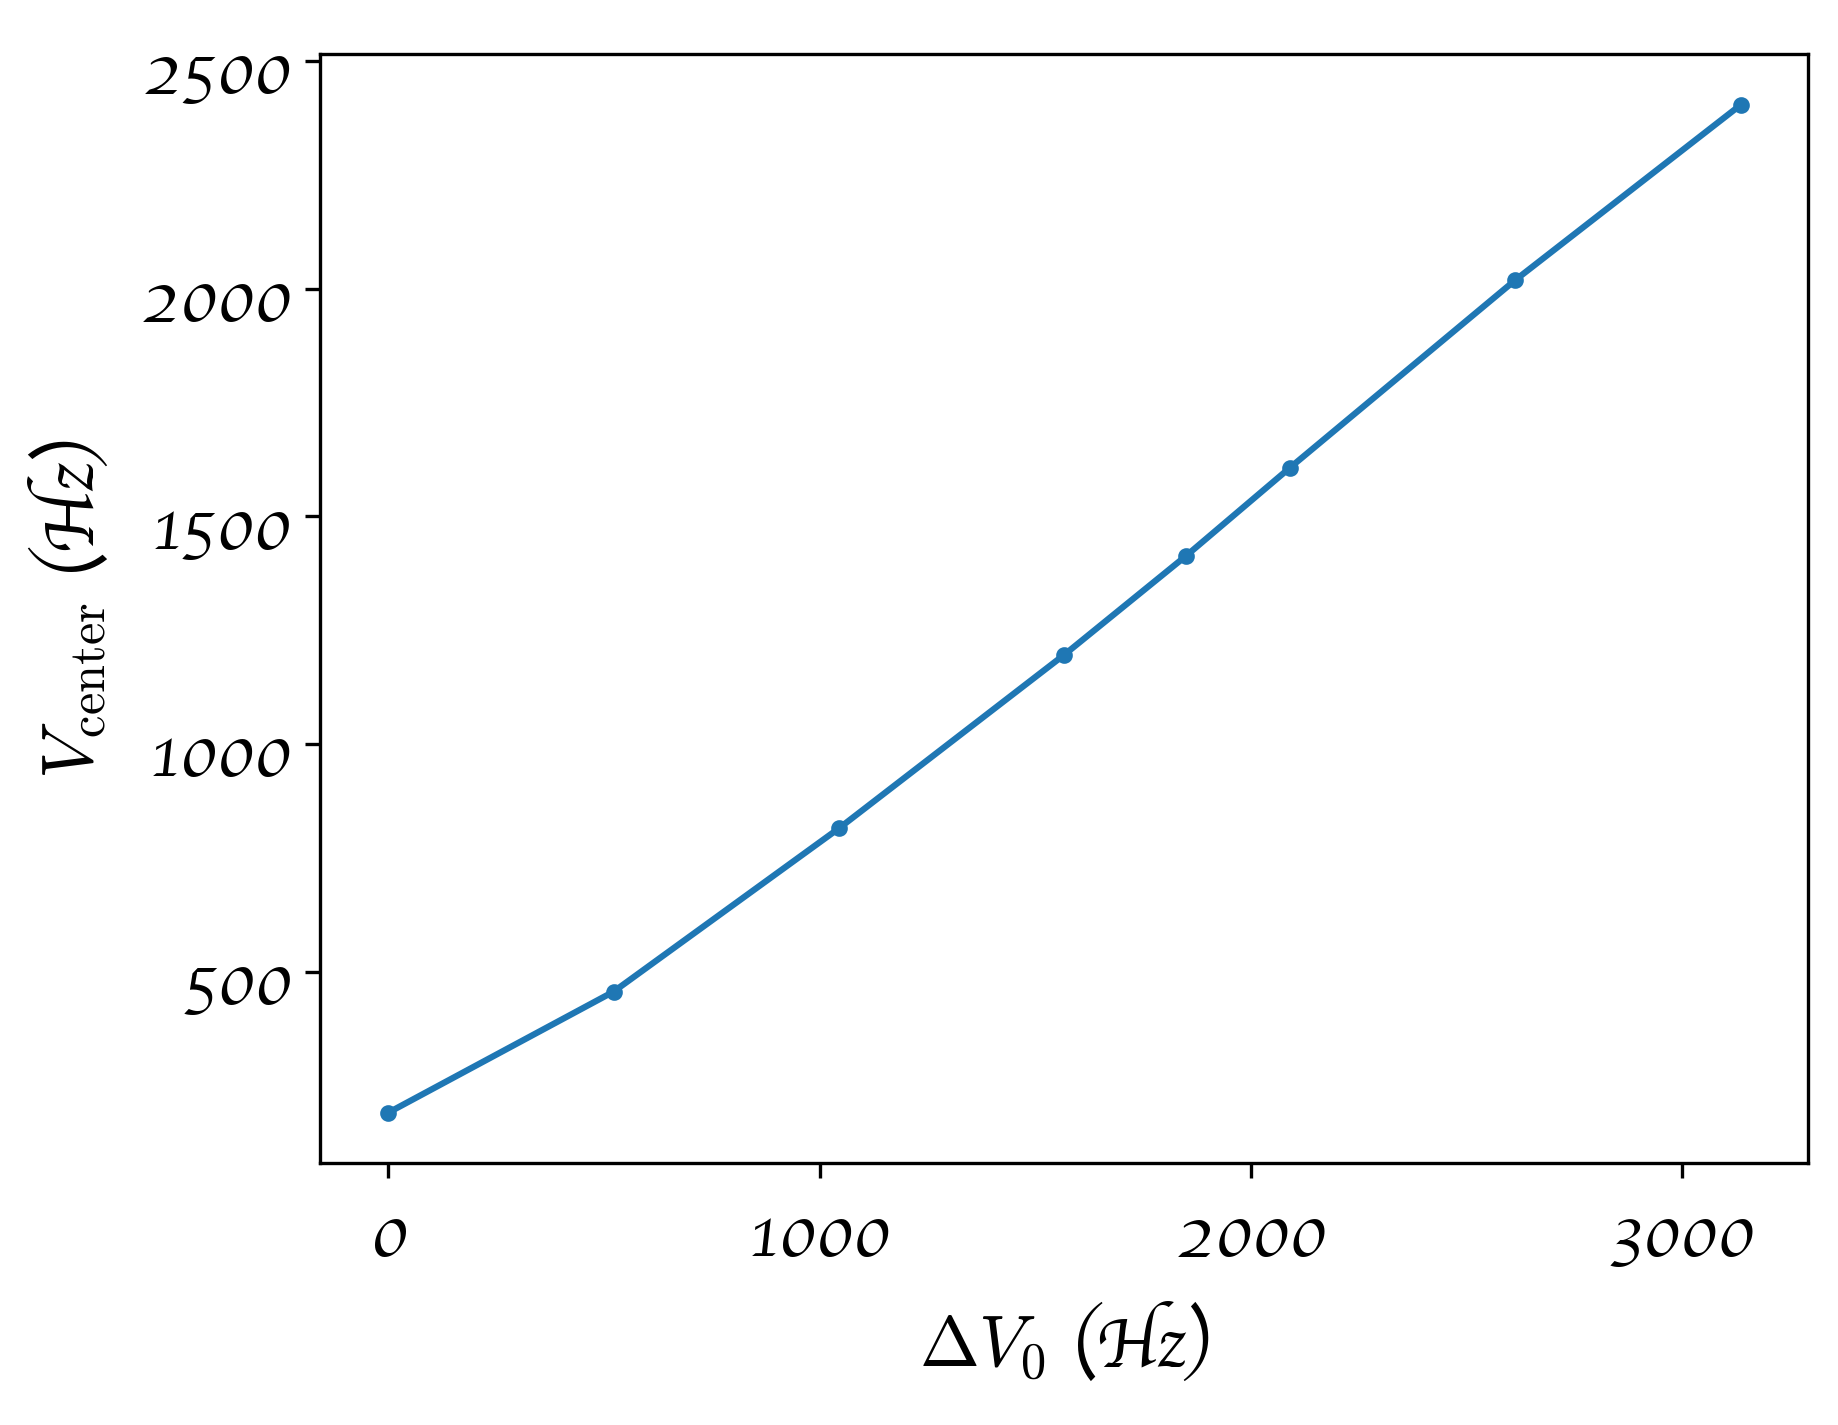

In [9]:
import matplotlib.pyplot as plt

params = {
    "mathtext.fontset": "cm",
    "font.family": 'Apple Chancery',
    "axes.unicode_minus": True,
}
plt.rcParams.update(params)

plt.plot(varr, Vlist, '.-', label="C")
plt.xlabel("$\Delta V_0$ (Hz)")
plt.ylabel("$V_\mathrm{center}$ (Hz)")

The total cost function values are plotted vs $\Delta V_0 = |V_0 -52.26\text{kHz}|$.

Text(0, 0.5, 'Total Error')

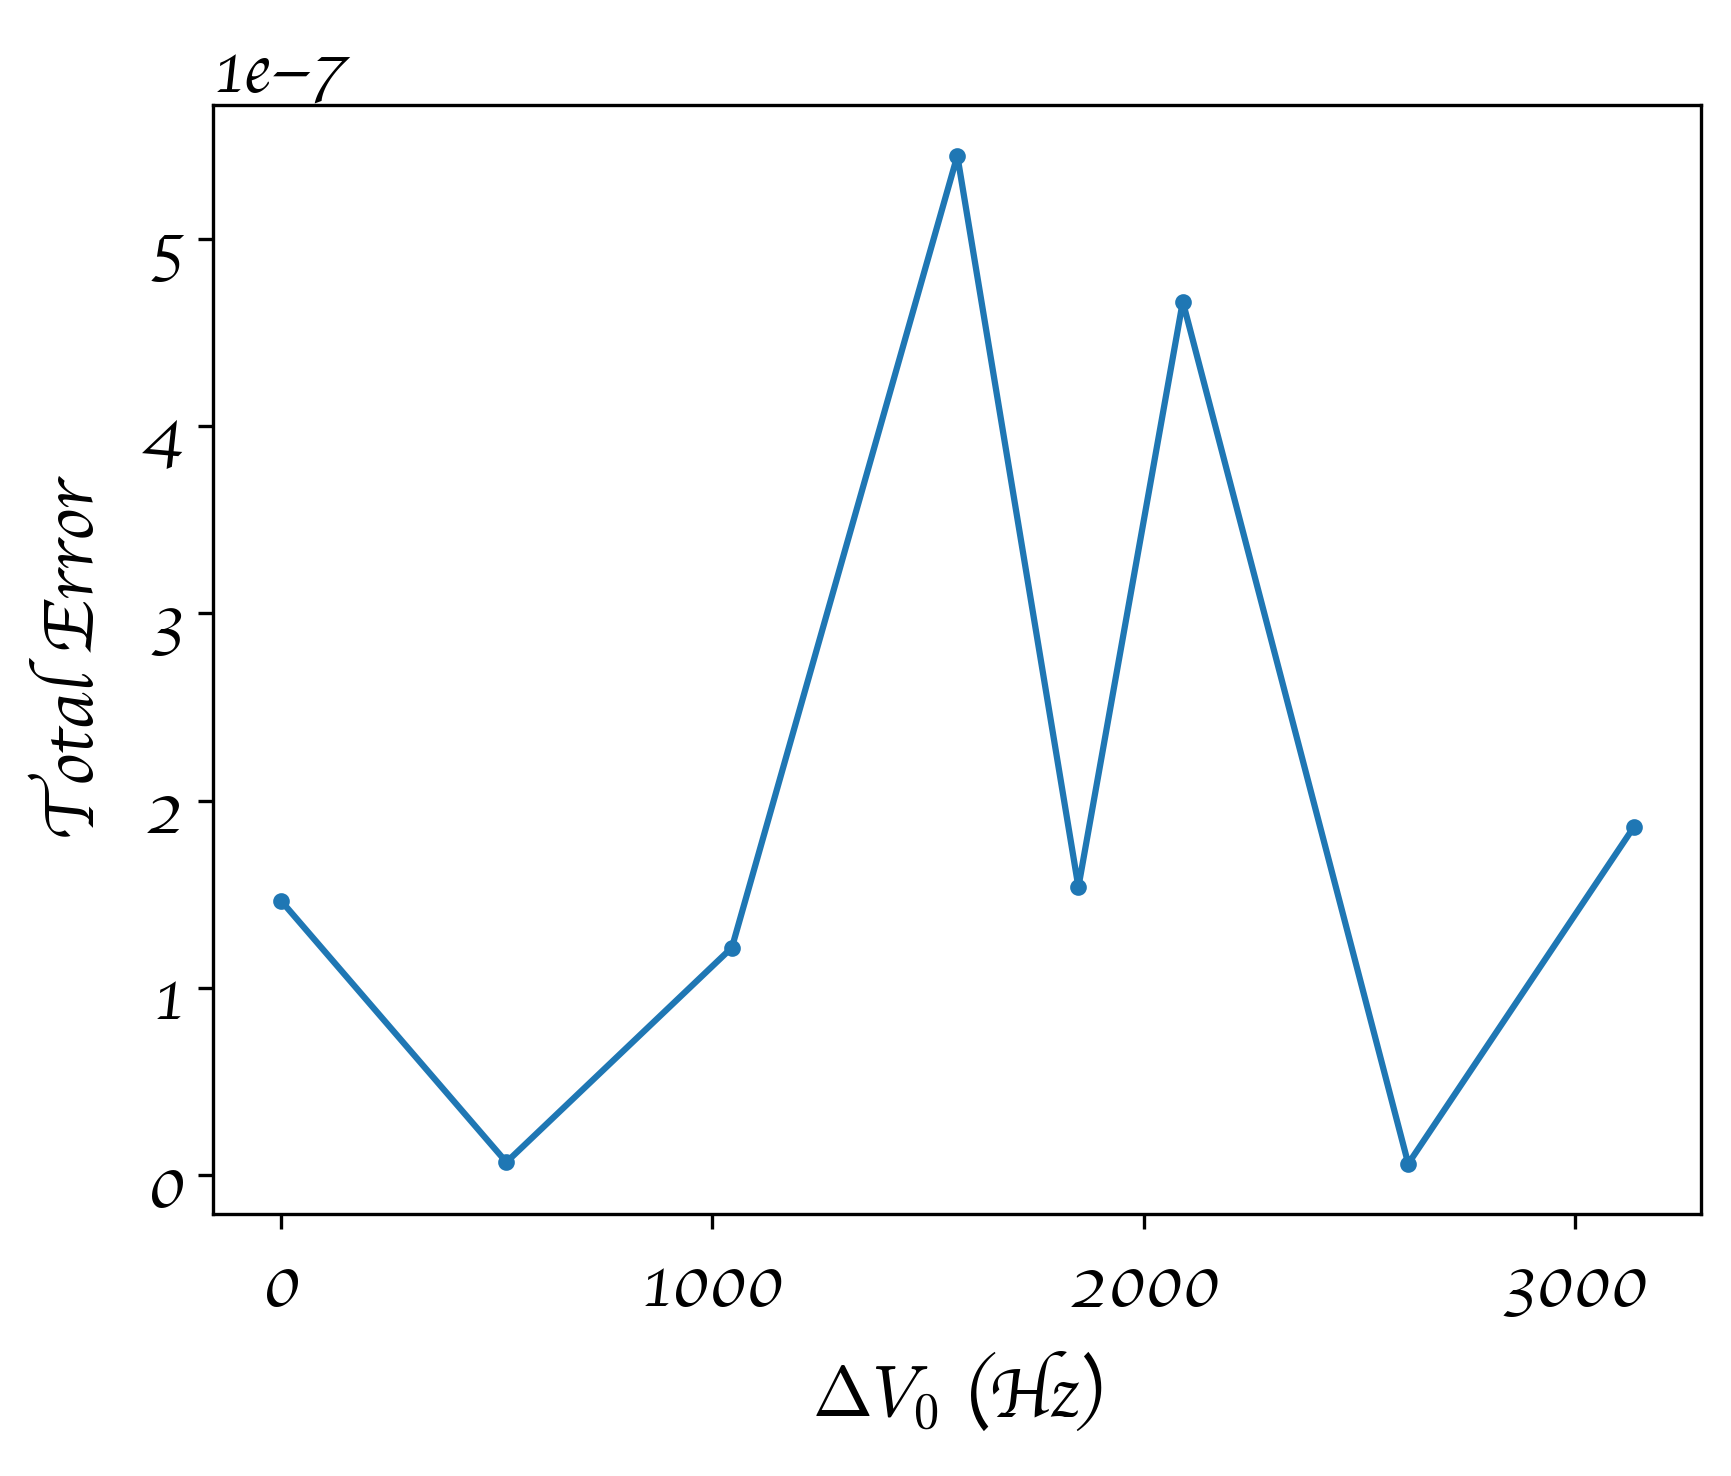

In [14]:
import matplotlib.pyplot as plt

params = {
    "mathtext.fontset": "cm",
    "font.family": 'Apple Chancery',
    "axes.unicode_minus": True,
}
plt.rcParams.update(params)

plt.plot(varr, err_list, '.-', label="C")
plt.xlabel("$\Delta V_0$ (Hz)")
plt.ylabel("Total Error")